
Summary statistics:
                age         job  marital  education in_default       balance  \
count   4521.000000        4521     4521       4521       4521   4521.000000   
unique          NaN          12        3          4          2           NaN   
top             NaN  management  married  secondary         no           NaN   
freq            NaN         969     2797       2306       4445           NaN   
mean      41.170095         NaN      NaN        NaN        NaN   1422.657819   
std       10.576211         NaN      NaN        NaN        NaN   3009.638142   
min       19.000000         NaN      NaN        NaN        NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN        NaN     69.000000   
50%       39.000000         NaN      NaN        NaN        NaN    444.000000   
75%       49.000000         NaN      NaN        NaN        NaN   1480.000000   
max       87.000000         NaN      NaN        NaN        NaN  71188.000000   

       housing  lo

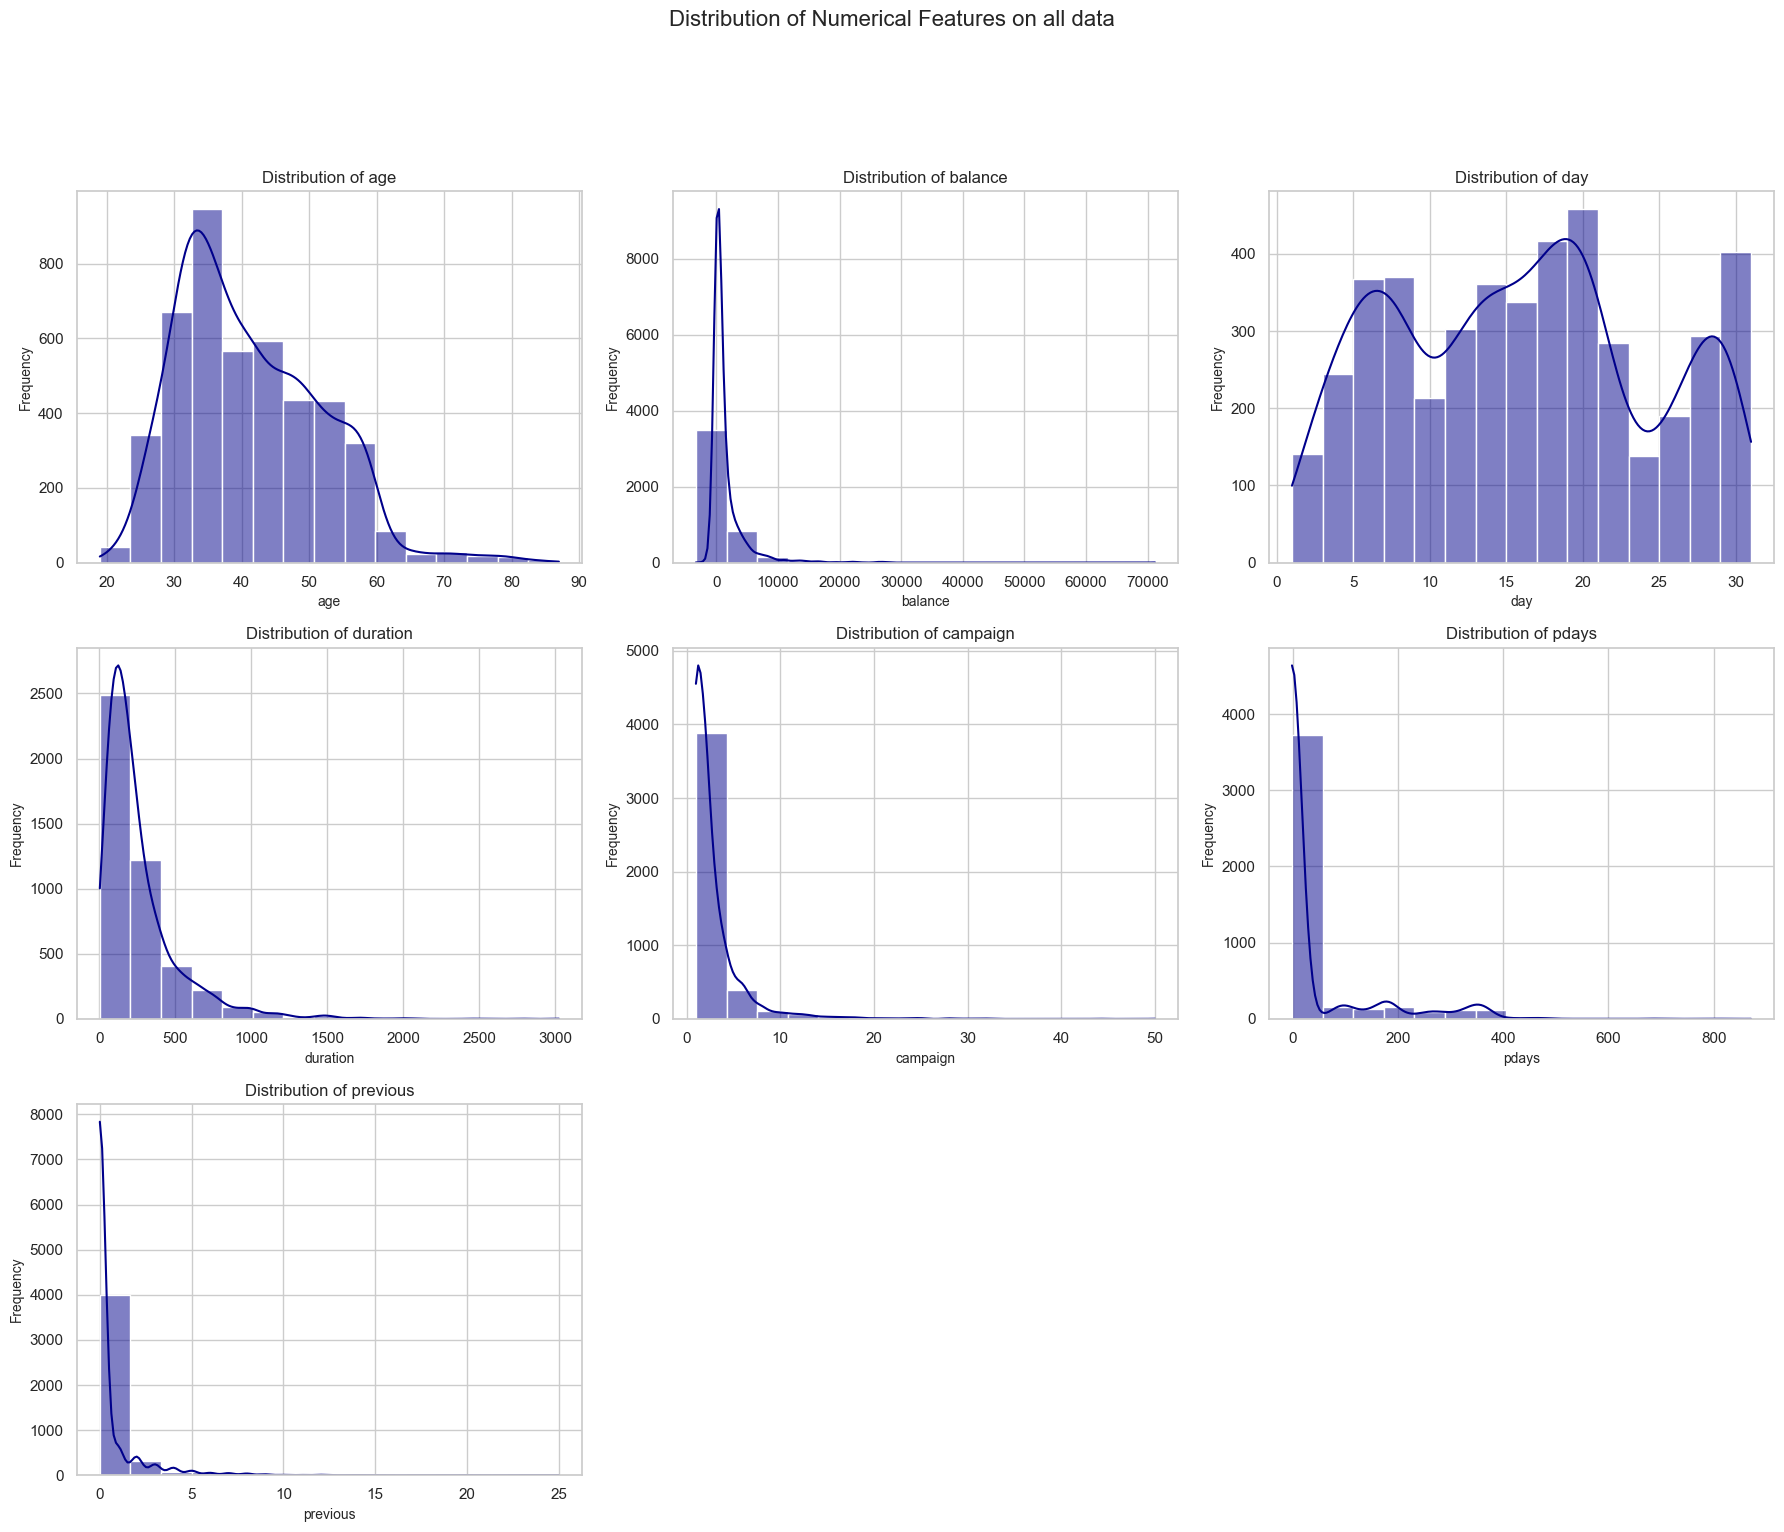

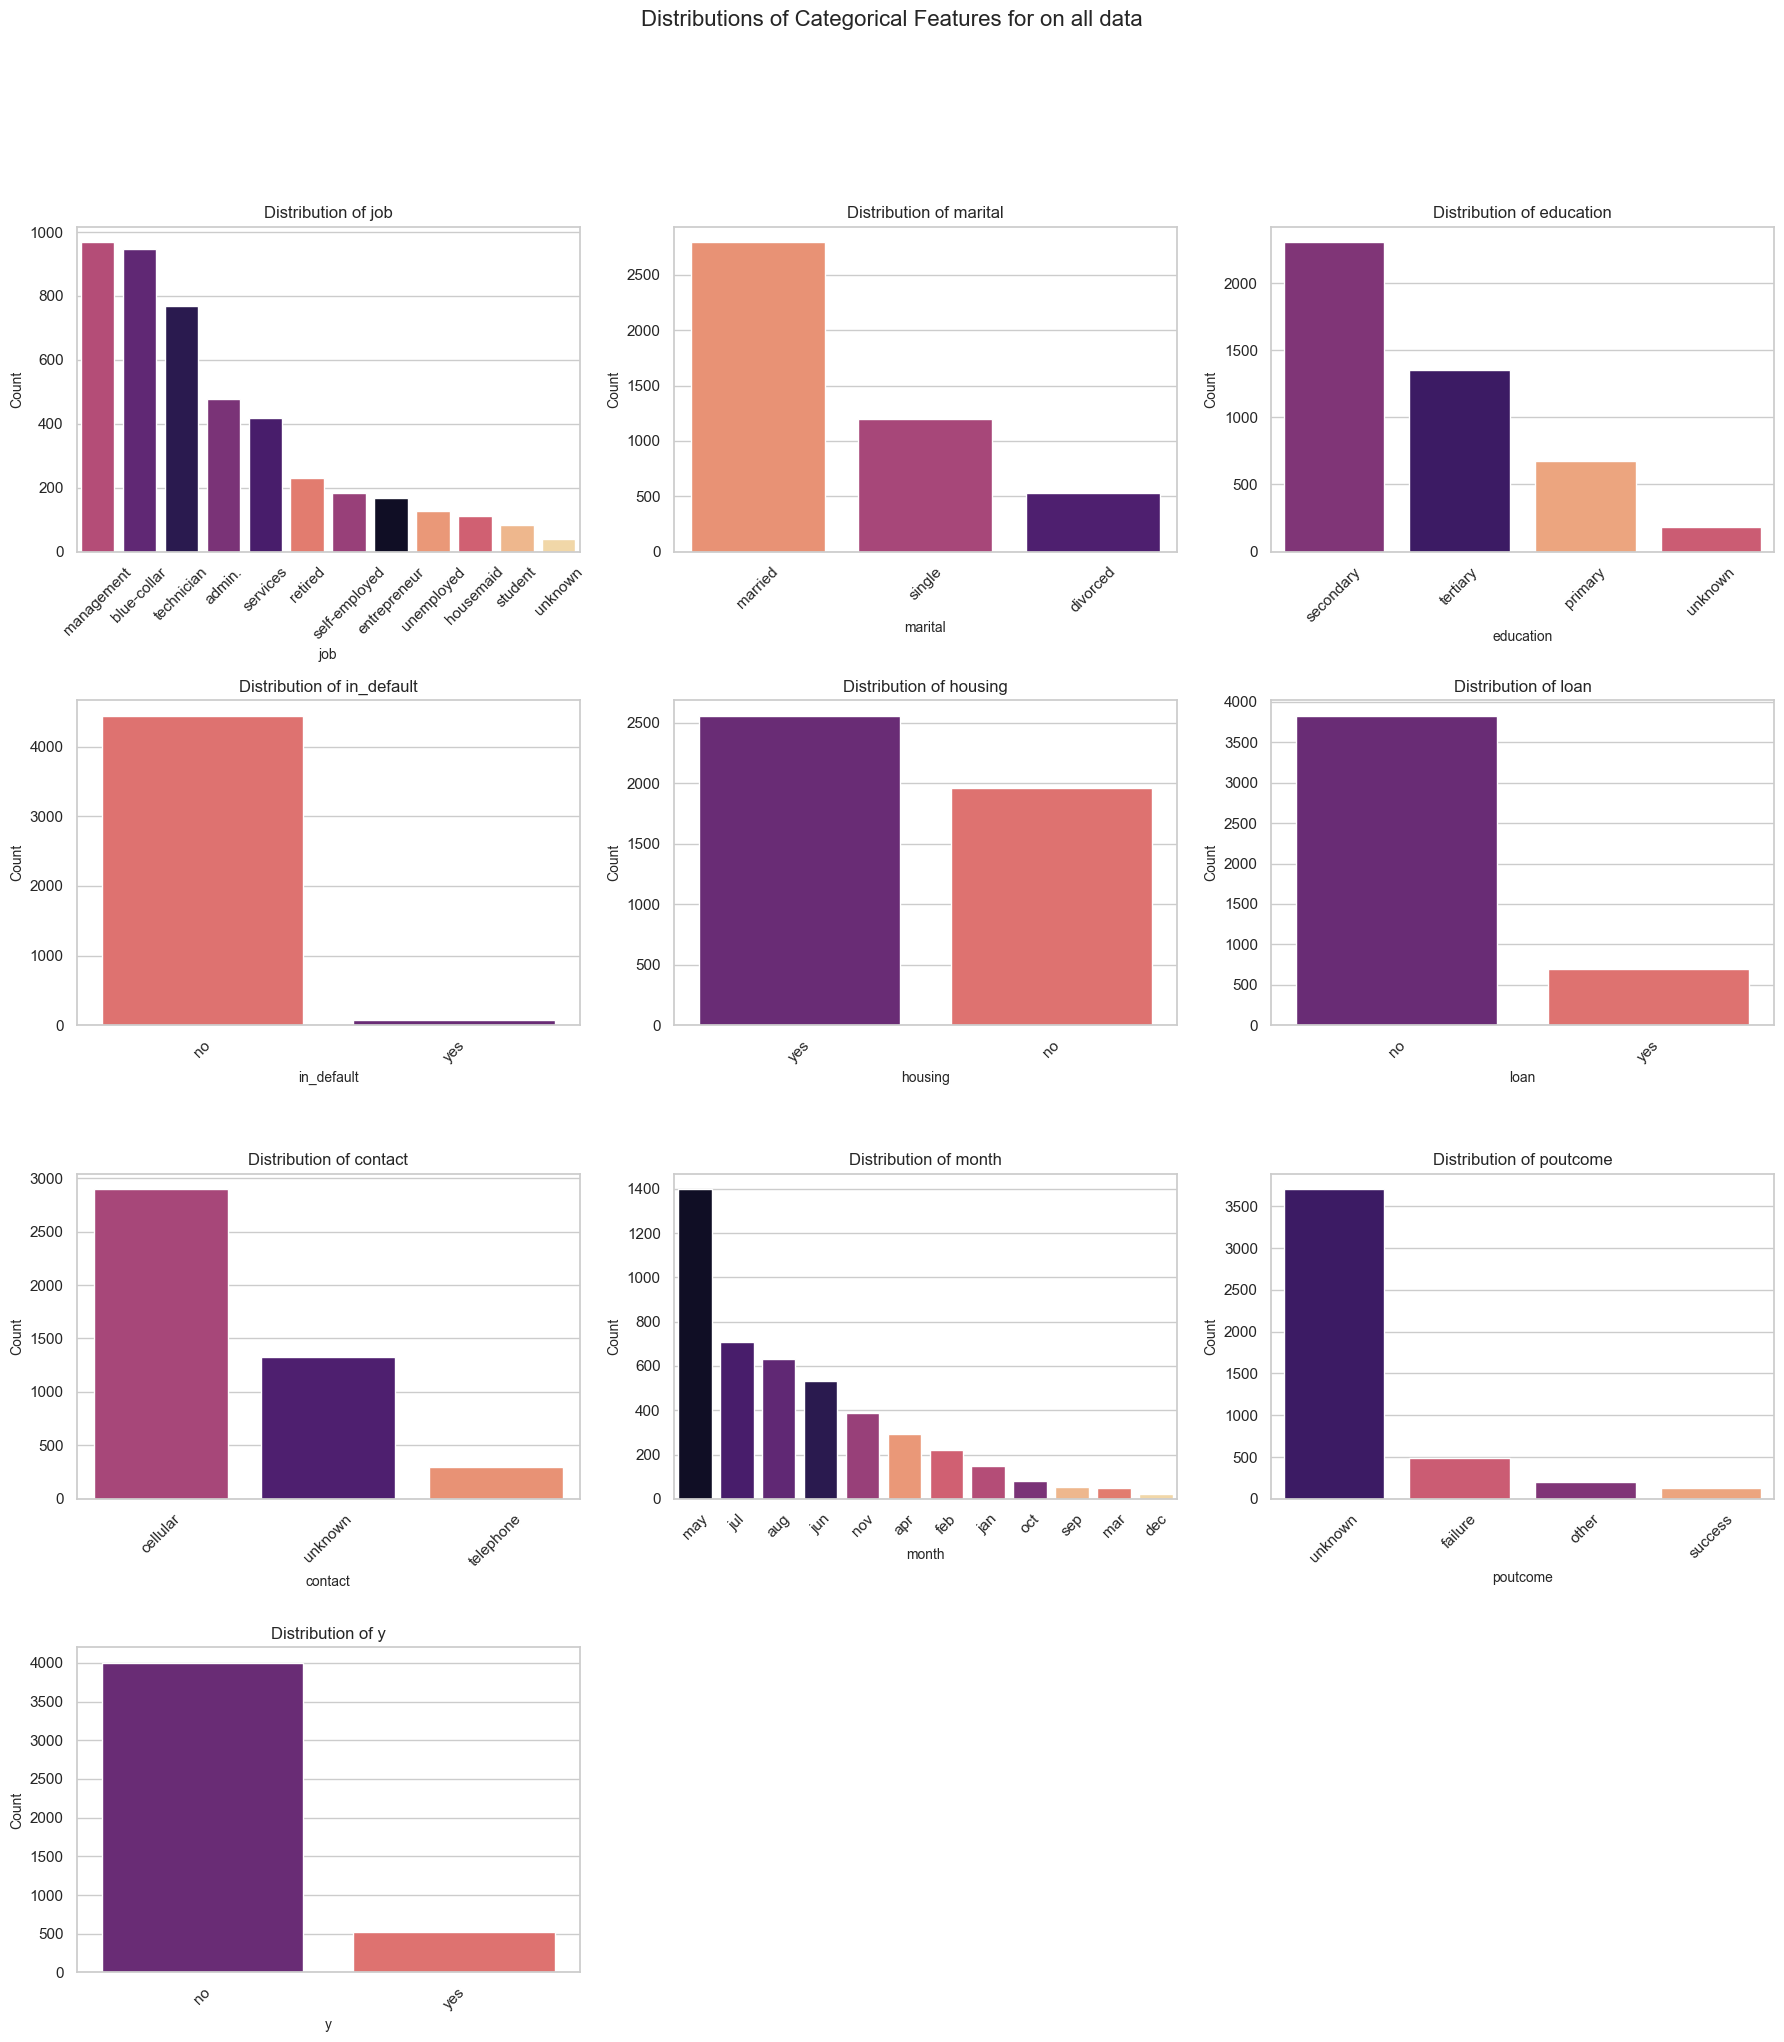

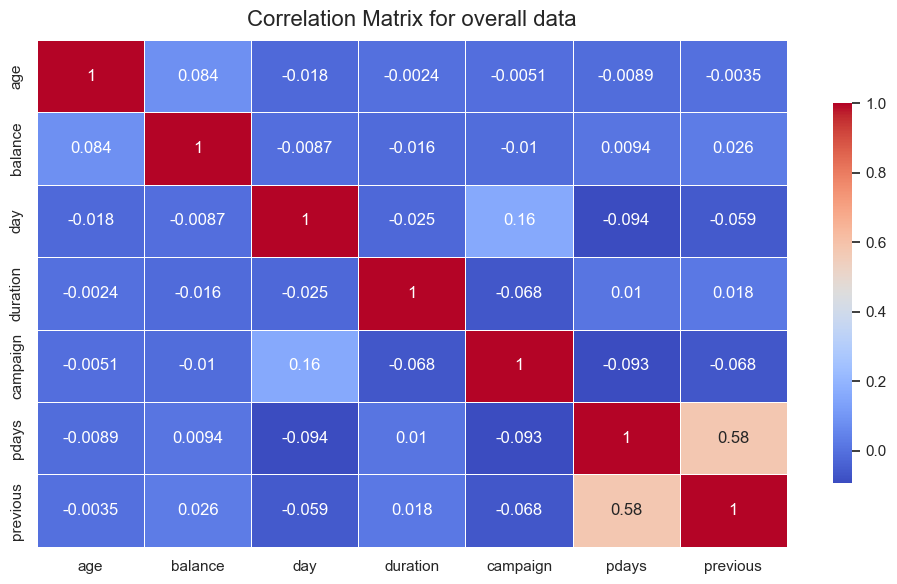

Correlation Matrix Table:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


In [98]:
"""This module performs exploratory data analysis (EDA) on the data. It focuses on records with 'yes' or 'no' in the 'y' column. 
It tests the data for multicollinearity."""

#importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import math
sns.set_theme(style="whitegrid")

#connecting to database
try:
    database_path = "data/data.db"
    conn = sqlite3.connect(database_path)
    query = open('data/fetch_all.sql', 'r').read()
    df = pd.read_sql_query(query, conn)
except (sqlite3.Error, FileNotFoundError) as e:
    print(f"An error occurred: {e}")
finally:
    if 'conn' in locals():
        conn.close()

# Defining general plotting functions for EDA:

import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set a consistent theme
sns.set_theme(style="whitegrid")

# Function to plot numerical features
def plot_numerical_features(data_source, chart_name):
    numerical_features = data_source.select_dtypes(include=['int64', 'float64']).columns

    if not numerical_features.empty:
        n_features = len(numerical_features)
        n_cols = 3  # Fixed number of columns for consistent layout
        n_rows = math.ceil(n_features / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
        axes = axes.flatten()

        for i, feature in enumerate(numerical_features):
            sns.histplot(data=data_source, x=feature, bins=15, ax=axes[i], kde=True, color="darkblue")
            axes[i].set_title(f"Distribution of {feature}", fontsize=12)
            axes[i].set_xlabel(feature, fontsize=10)
            axes[i].set_ylabel("Frequency", fontsize=10)

        # Remove unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        fig.suptitle(chart_name, fontsize=16, y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print("No numerical features found.")

# Function to plot categorical features
def plot_categorical_features(data_source, number_of_columns, data_selection_name):
    categorical_features = data_source.select_dtypes(include=['object']).columns
    n_features = len(categorical_features)
    n_cols = number_of_columns
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        sns.countplot(
            data=data_source,
            x=feature,
            hue=feature,  # Assign x variable to hue
            ax=axes[i],
            palette="magma",
            legend=False,  # Suppress legend for clarity
            order=data_source[feature].value_counts().index
        )
        axes[i].set_title(f"Distribution of {feature}", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel("Count", fontsize=10)
        axes[i].set_xlabel(feature, fontsize=10)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Distributions of Categorical Features for {data_selection_name}", fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Function to create a correlation matrix
def correlation_matrix(data_source, matrix_name):
    numerical_features = data_source.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = data_source[numerical_features].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.75})
    plt.title(f"Correlation Matrix for {matrix_name}", fontsize=16, pad=10)
    plt.tight_layout()
    plt.show()

    print("Correlation Matrix Table:")
    print(correlation_matrix)


# Filtering data for analysing the campaign results - filter only rows with 'yes' or 'no' in the 'y' column
df = df[df['y'].isin(['no', 'yes'])]

# Drop unwanted columns
df = df.drop(columns=['client_id', 'account_id', 'campaign_id', 'outcome_id'])

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


# Plotting distribution of numerical features of all data

plot_numerical_features(df, "Distribution of Numerical Features on all data")

# Plotting distribution of categorical features of all data
plot_categorical_features(df, 3, "on all data")

# Plotting distribution of numerical features of all data
correlation_matrix(df, "overall data")




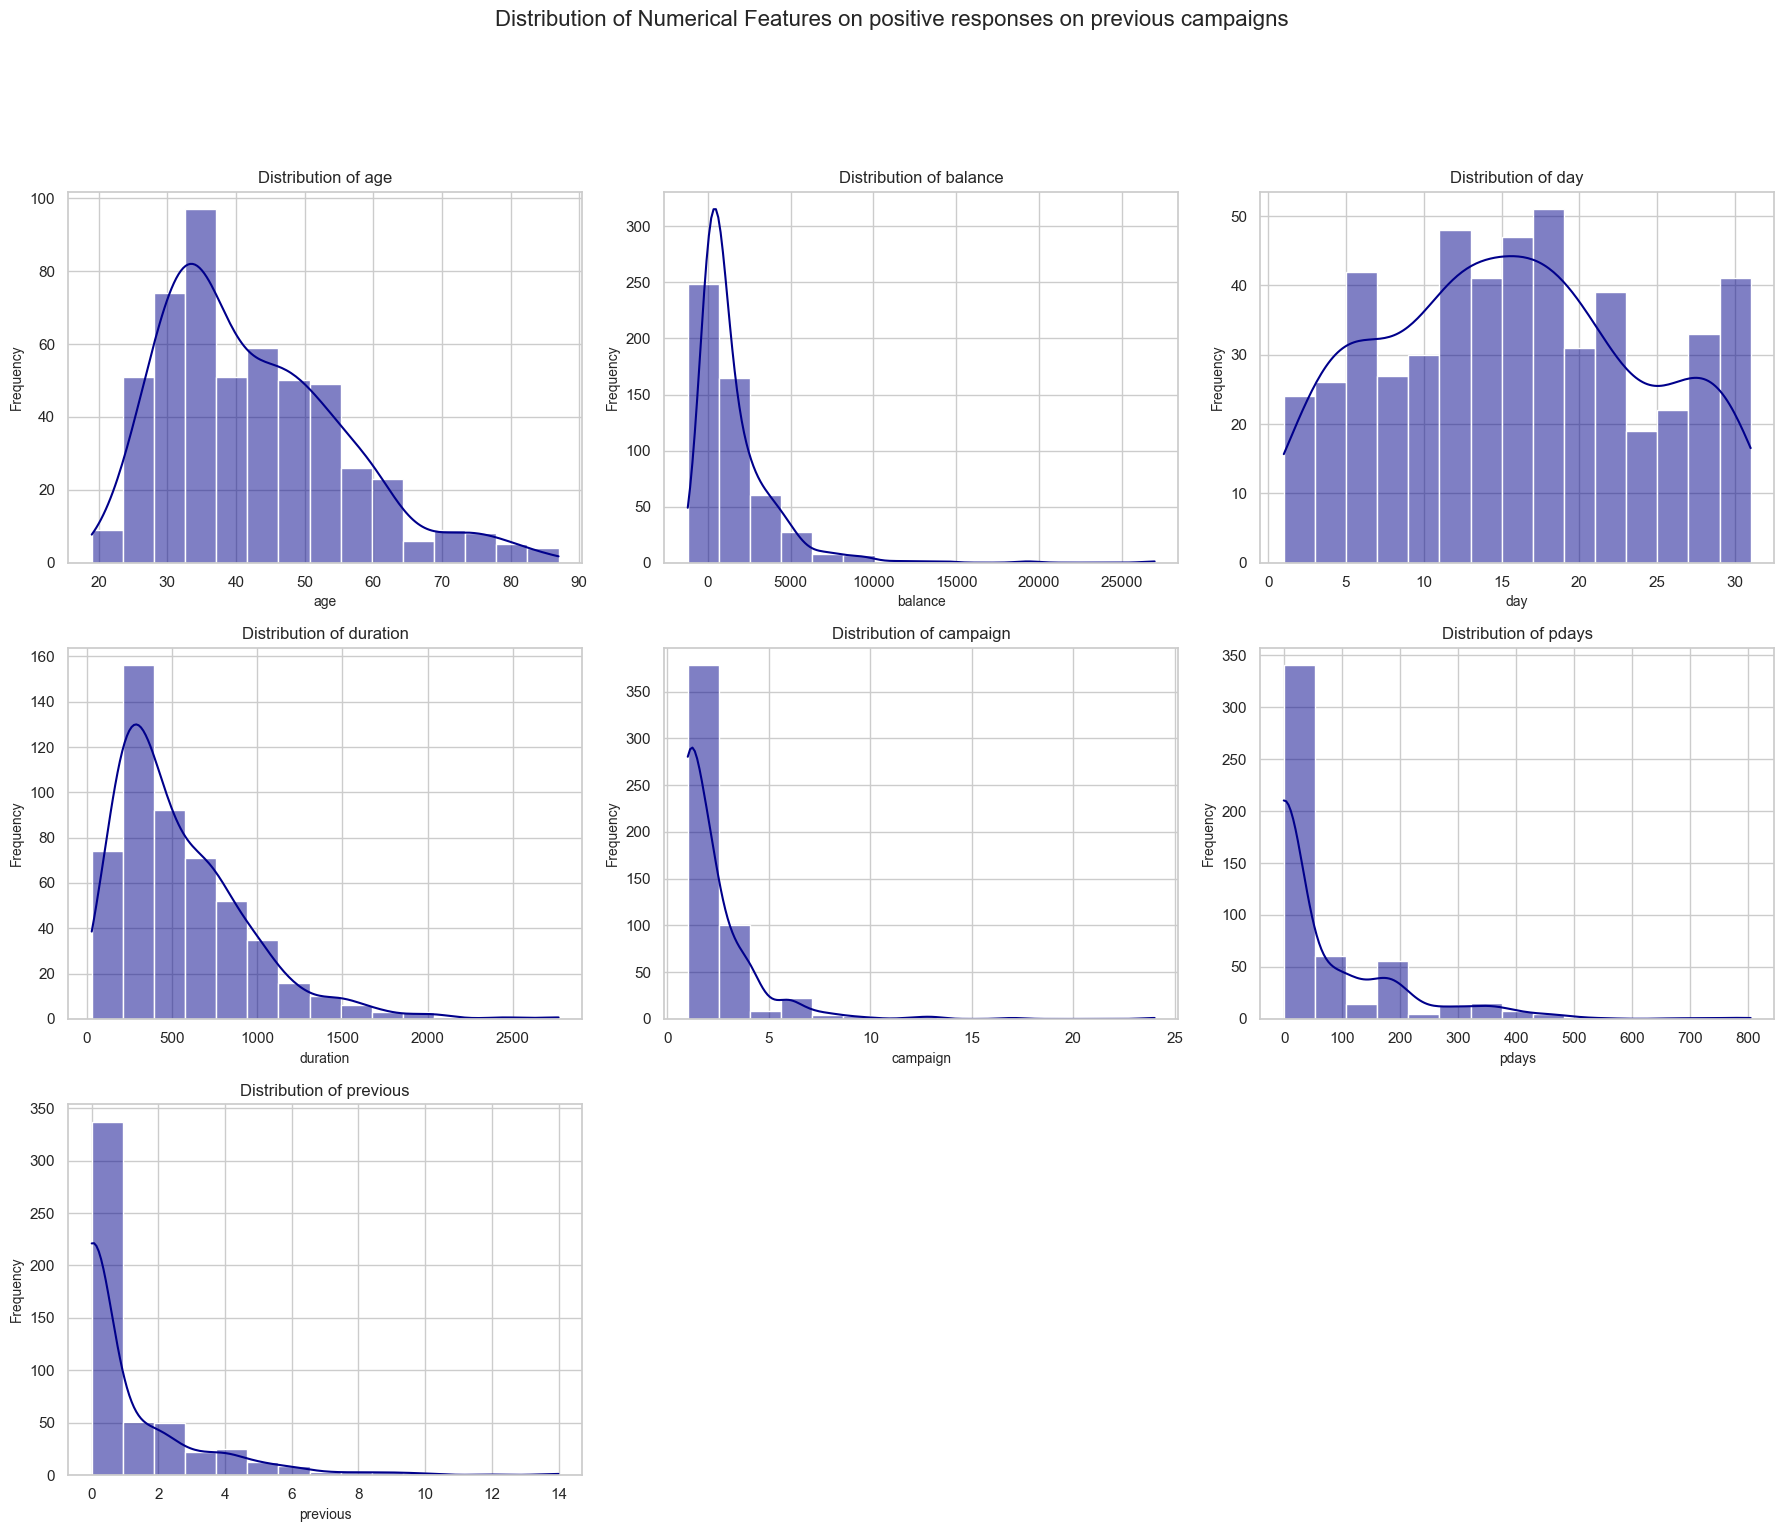

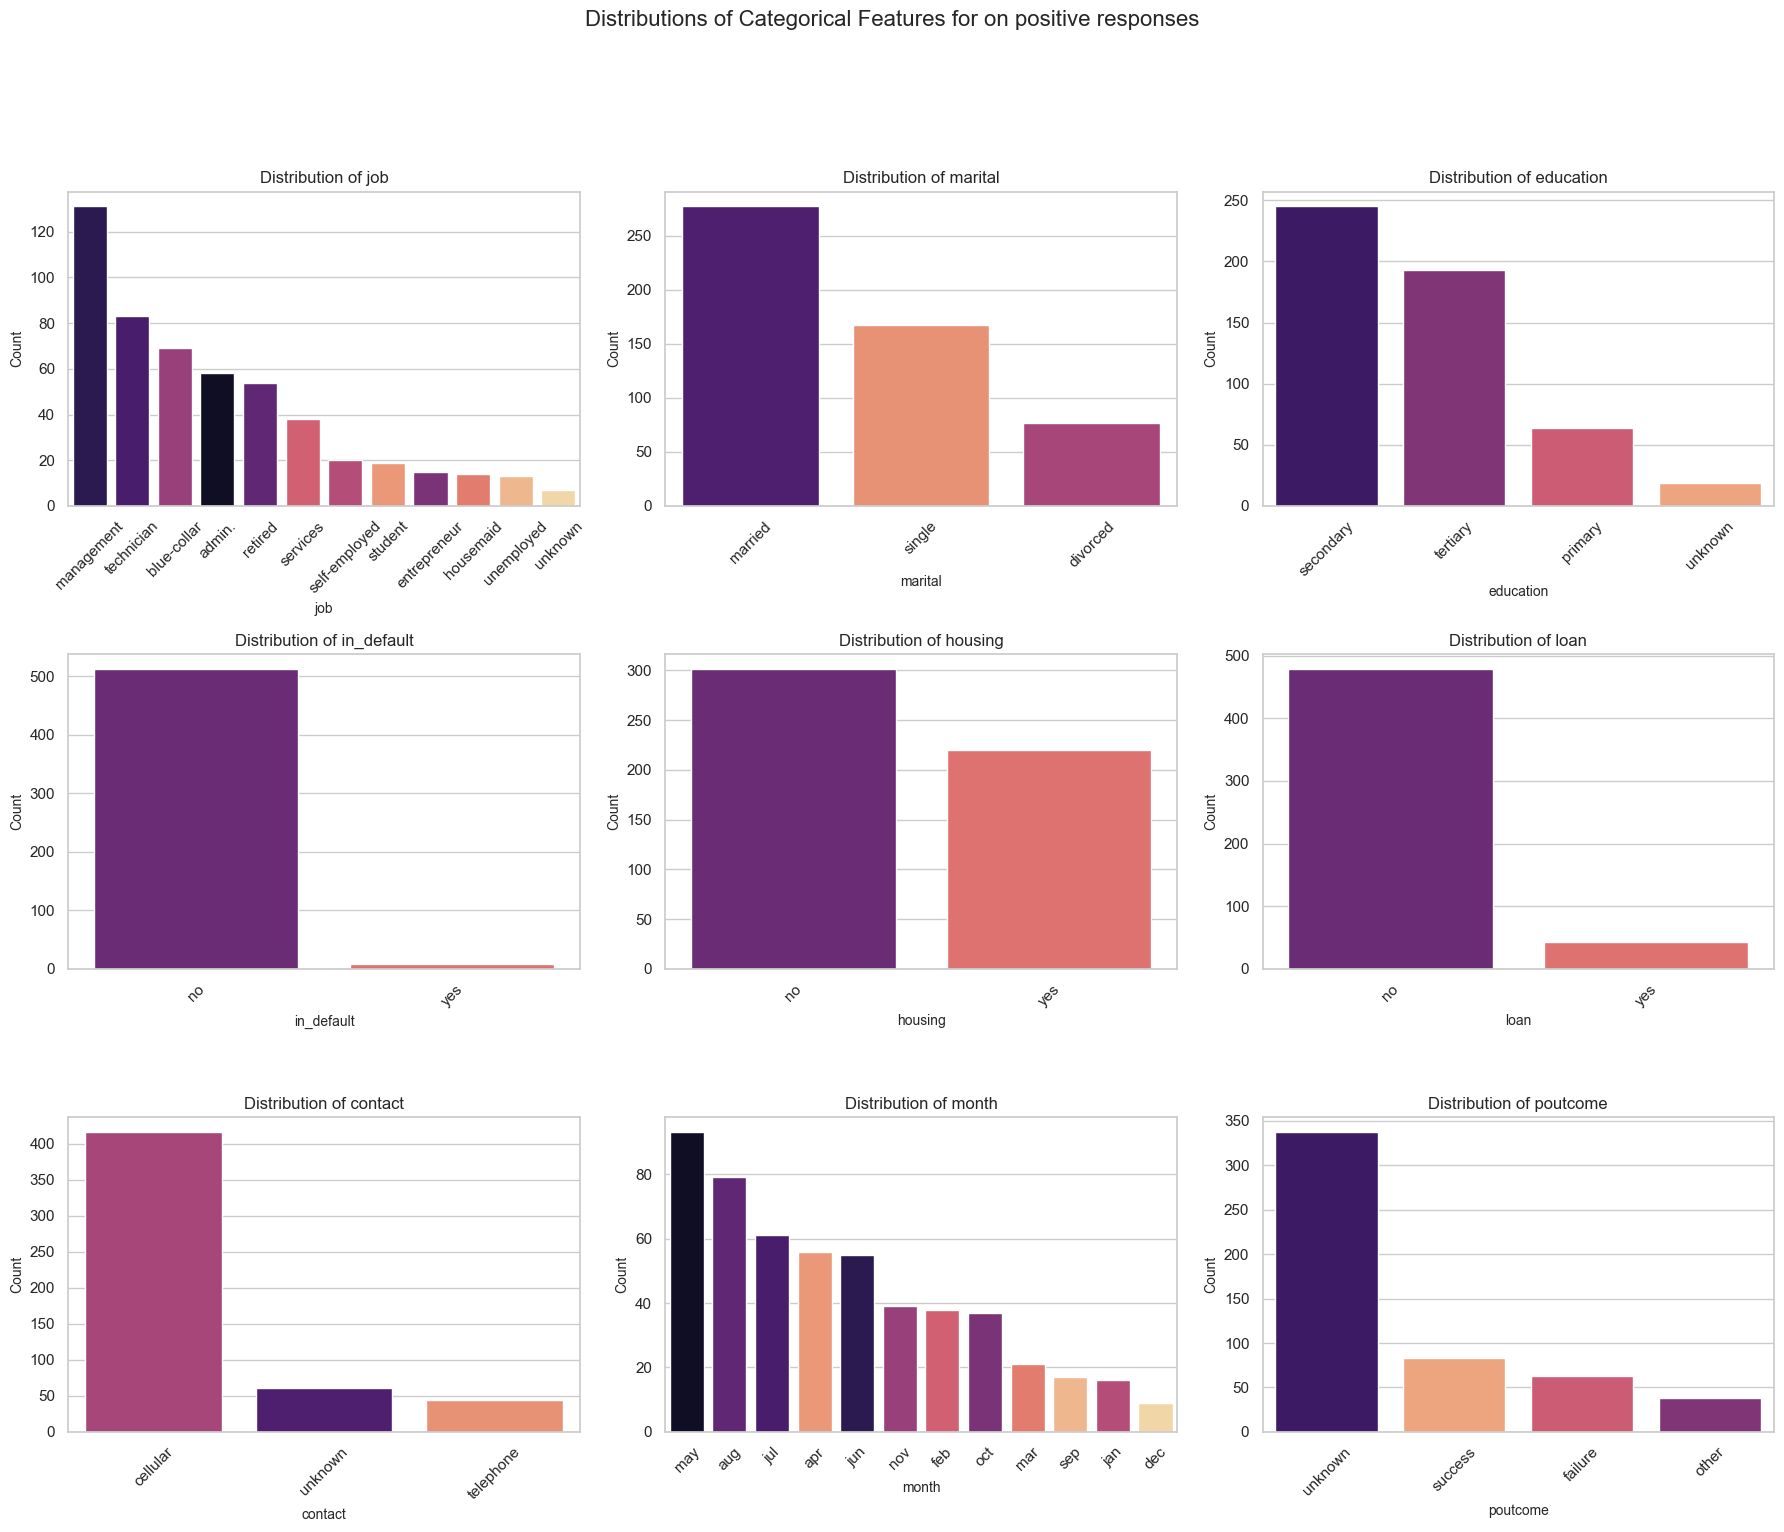

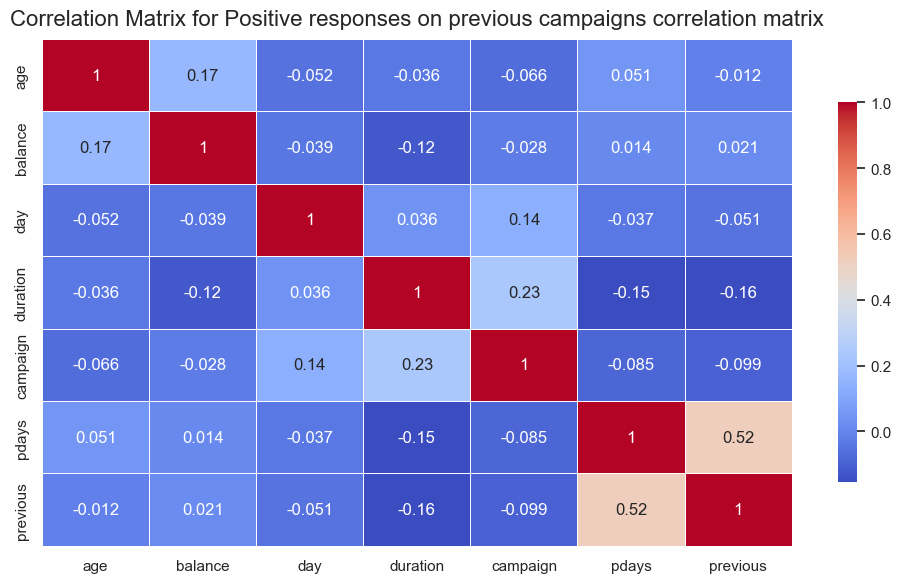

Correlation Matrix Table:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.168447 -0.052070 -0.036333 -0.065831  0.050716 -0.011920
balance   0.168447  1.000000 -0.038578 -0.120070 -0.028038  0.013520  0.020503
day      -0.052070 -0.038578  1.000000  0.036100  0.137796 -0.037339 -0.051234
duration -0.036333 -0.120070  0.036100  1.000000  0.234318 -0.154891 -0.155493
campaign -0.065831 -0.028038  0.137796  0.234318  1.000000 -0.084879 -0.098632
pdays     0.050716  0.013520 -0.037339 -0.154891 -0.084879  1.000000  0.518231
previous -0.011920  0.020503 -0.051234 -0.155493 -0.098632  0.518231  1.000000


,age,job,marital,education,in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
86,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
1124,29,management,married,tertiary,no,199.0,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes
1416,43,management,divorced,tertiary,no,388.0,yes,no,unknown,8,may,2087,2,-1,0,unknown,yes
1795,60,technician,married,primary,no,65.0,yes,no,unknown,9,may,1028,2,-1,0,unknown,yes
2096,32,management,single,tertiary,no,311.0,no,no,unknown,12,may,757,2,-1,0,unknown,yes


In [99]:
"""This module performs exploratory data analysis (EDA) on clients with positive responses to the previous campaign (Y = 'yes'). It focuses on records with 'yes'in the 'y' column. 
"""

#EDA for "yes clients

df_campaign_yes = df[df['y'] == 'yes']
df_campaign_yes_clean= df_campaign_yes.drop(columns = ['y'])

plot_numerical_features(df_campaign_yes_clean, "Distribution of Numerical Features on positive responses on previous campaigns")

# Plotting distribution of categorical features of all data
plot_categorical_features(df_campaign_yes_clean,3, "on positive responses")

# Plotting distribution of numerical features of all data
correlation_matrix(df_campaign_yes_clean, "Positive responses on previous campaigns correlation matrix")

df_campaign_yes.head()

Seems like longer time passed from the last contact and lower balance have higher distribution of positive response:


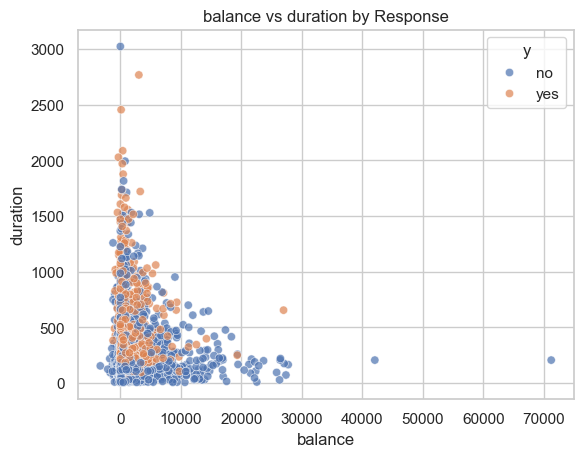

people are more likely to respond positively if we con't call them too often:


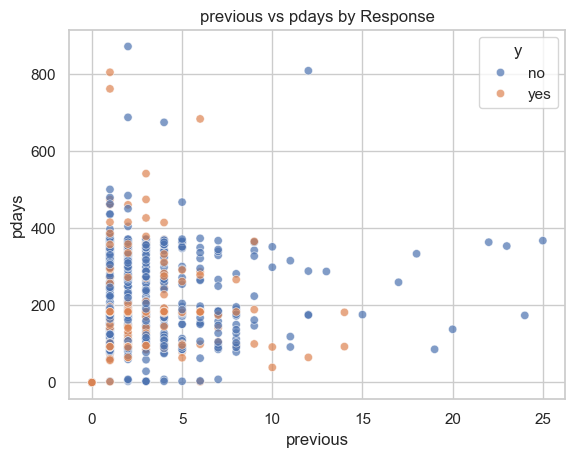

In [ ]:
# Scatterplots / to be added
def scatterplot_byresponse(data_source, x_axes, y_axes):
        sns.scatterplot(data=data_source, x=x_axes, y=y_axes, hue='y', alpha=0.7)
        plt.title(f'{x_axes} vs {y_axes} by Response')
        plt.xlabel(x_axes)
        plt.ylabel(y_axes)
        plt.show()


print("Seems like longer time passed from the last contact and lower balance have higher distribution of positive response:")
scatterplot_byresponse(df, "balance", "duration")

print("people are more likely to respond positively if we con't call them too often:")
scatterplot_byresponse(df, "previous", "pdays")



First few rows of the encoded DataFrame:
   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   42      2.0    5       380         1     -1         0              0.0   
1   43    593.0    5        55         1     -1         0              0.0   
2   57    162.0    5       174         1     -1         0              0.0   
3   57    839.0    5       225         1     -1         0              0.0   
4   59      0.0    5       226         1     -1         0              1.0   

   job_entrepreneur  job_housemaid  ...  education_unknown  in_default_yes  \
0               1.0            0.0  ...                0.0             1.0   
1               0.0            0.0  ...                0.0             0.0   
2               0.0            0.0  ...                0.0             0.0   
3               0.0            0.0  ...                0.0             0.0   
4               0.0            0.0  ...                0.0             0.0   

   housing_yes  loan_

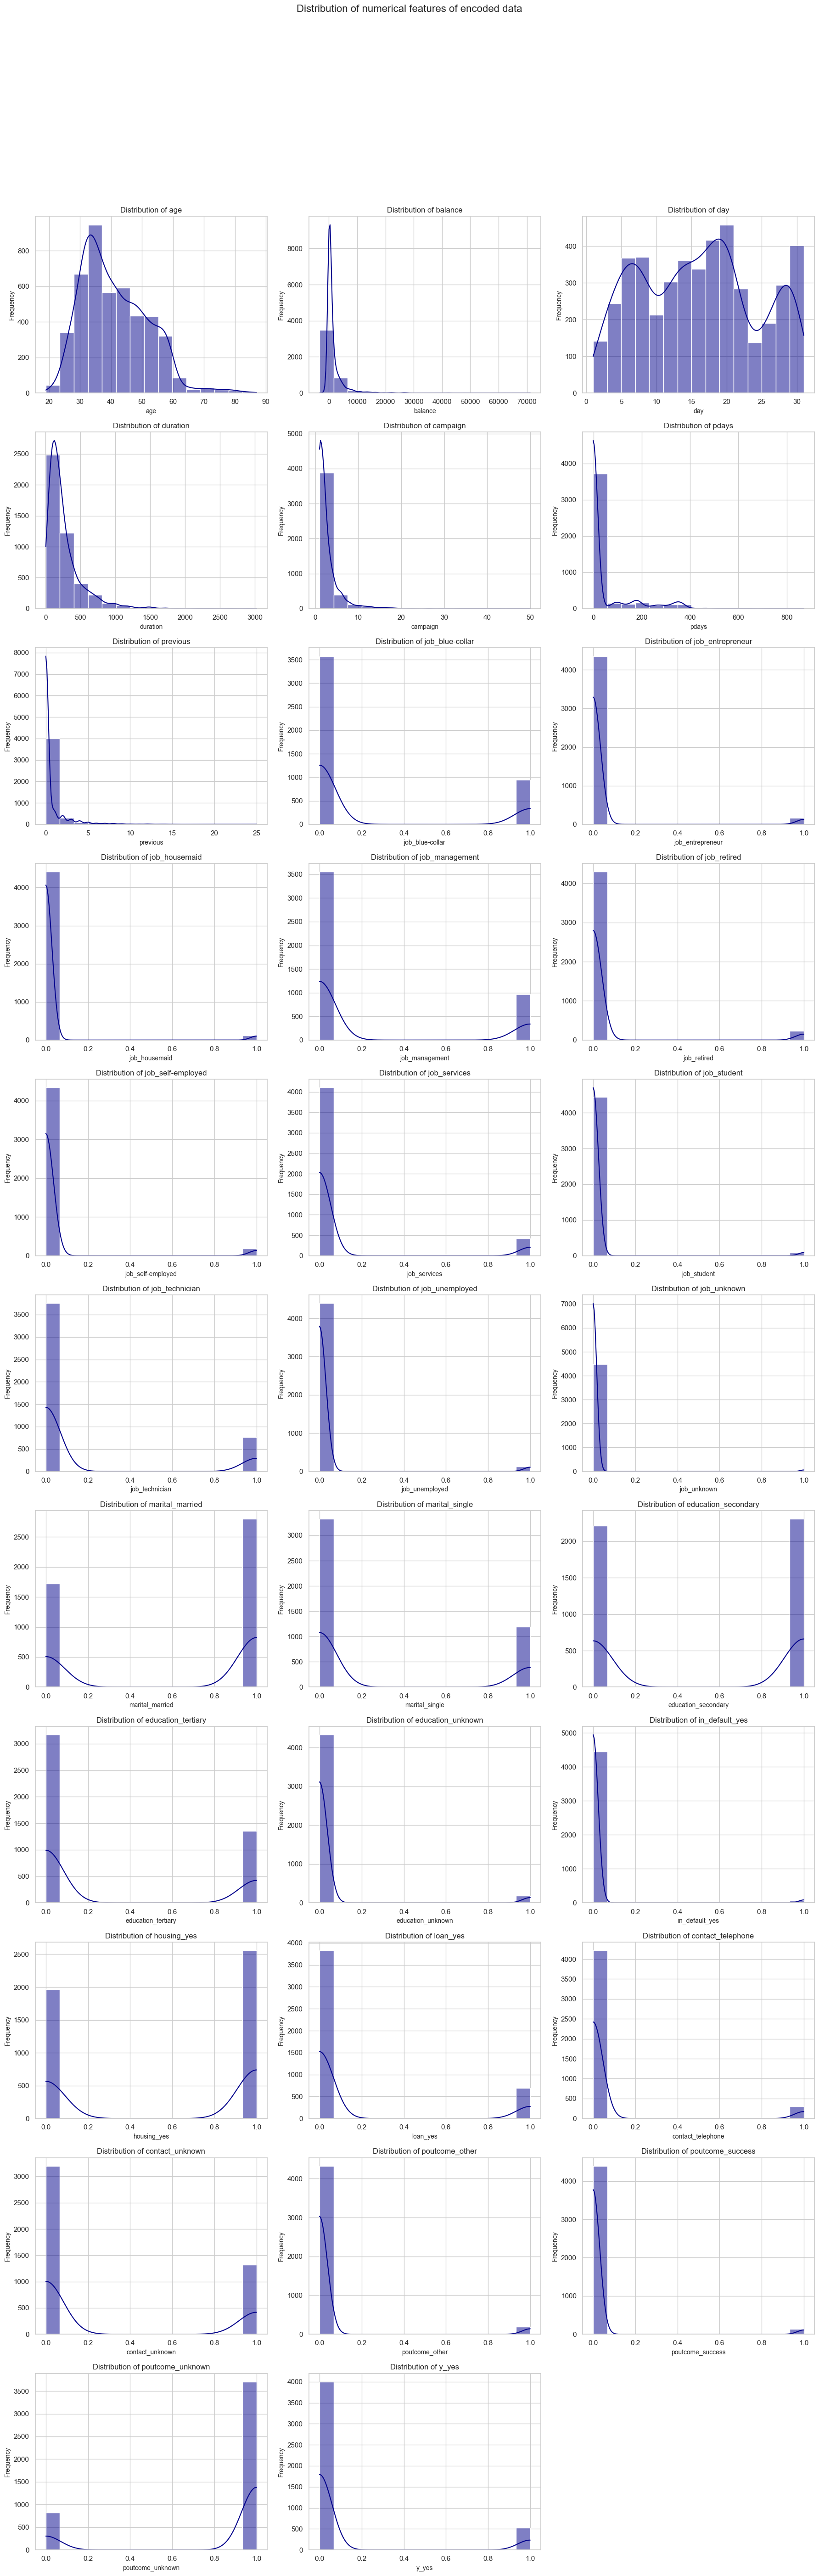

In [101]:

encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = df.select_dtypes(include=['object']).columns
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
encoded_df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(columns=categorical_features)
encoded_df_adjusted = encoded_df.loc[:, ~encoded_df.columns.str.startswith('month_')]

# Display the first few rows of the encoded DataFrame
print("First few rows of the encoded DataFrame:")
print(encoded_df_adjusted.head())

# Distribution of numerical features
plot_numerical_features(encoded_df_adjusted, "Distribution of numerical features of encoded data")



# numerical_features = encoded_df.select_dtypes(include=['int64', 'float64']).columns
# if not numerical_features.empty:
#     encoded_df[numerical_features].hist(bins=15, figsize=(15, 6))
#     plt.suptitle('Distribution of Numerical Features')
#     plt.show()
# else:
#     print("No numerical features found.")

# # Distribution of categorical features
# categorical_features = encoded_df.select_dtypes(include=['object']).columns
# if not categorical_features.empty:
#     for feature in categorical_features:
#         plt.figure(figsize=(10, 4)) 
#         sns.countplot(data=df, x=feature)
#         plt.title(f'Distribution of {feature}')
#         plt.xticks(rotation=45)
#         plt.show()
# else:
#     print("No categorical features found.")

# # Correlation matrix
# correlation_matrix = encoded_df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

# # Display correlation matrix as a table
# print("Correlation Matrix Table:")
# print(correlation_matrix)



In [ ]:
# Checking for Multicollinearity in the Encoded DataFrame

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop specified columns
encoded_df = encoded_df.drop(columns=['campaign_id', 'account_id', 'outcome_id'])
# Calculate VIF for each feature
def calculate_vif(encoded_df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = encoded_df.columns
    vif_data["VIF"] = [variance_inflation_factor(encoded_df.values, i) for i in range(len(encoded_df.columns))]
    return vif_data

# Calculate VIF for encoded_df
vif_df = calculate_vif(encoded_df)

# Display the VIF values
print("Variation Inflation Factor (VIF) for each feature:")
print(vif_df)

Variation Inflation Factor (VIF) for each feature:
                feature        VIF
0             client_id   5.483423
1                   age  20.255440
2               balance   1.298749
3                   day   6.042119
4              duration   2.508196
5              campaign   2.033572
6                 pdays   4.113911
7              previous   2.010418
8       job_blue-collar   3.079147
9      job_entrepreneur   1.417311
10        job_housemaid   1.303673
11       job_management   3.934918
12          job_retired   1.844976
13    job_self-employed   1.444787
14         job_services   1.835080
15          job_student   1.240513
16       job_technician   2.637575
17       job_unemployed   1.290916
18          job_unknown   1.135691
19      marital_married   5.982424
20       marital_single   3.279656
21  education_secondary   4.815466
22   education_tertiary   4.391507
23    education_unknown   1.346974
24       in_default_yes   1.037364
25          housing_yes   3.176704
26  

   Principal Component 1  Principal Component 2
0              -3.298158               0.423281
1              -3.171890               1.781815
2              -3.511541               2.040781
3              -3.319121               1.046983
4              -3.553346               2.076589


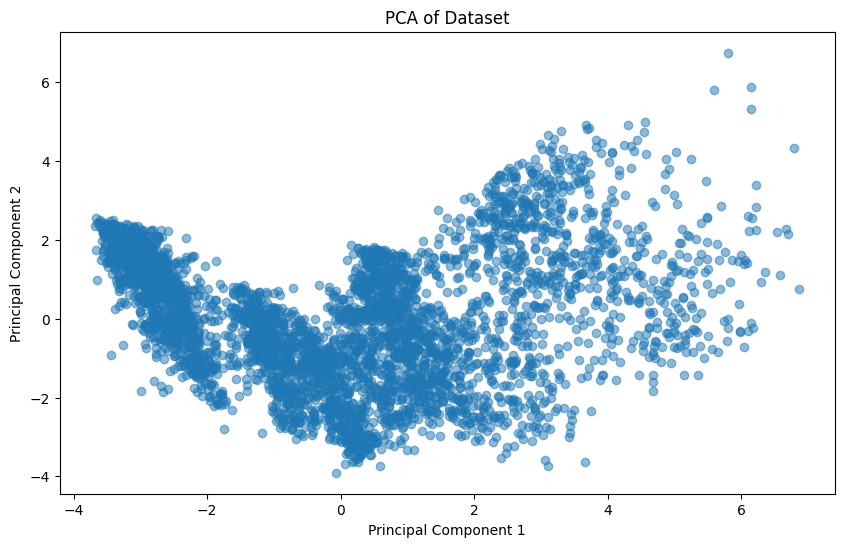

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(encoded_df)

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
print(df_pca.head())

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()